In [132]:
%reload_ext autoreload
%autoreload 2

from scara.ptservo import PTServoArduino
from scara.kinematics import mk_kine_pair
import matplotlib.pyplot as plt
from time import sleep
import pandas as pd

serial_port = '/dev/tty.usbmodem22121401'  # Replace with your serial port
baud_rate = 115200  # Replace with your baud rate




In [125]:
from math import cos, sin, pi

l1 = 103
l2 = 110
forward, inverse = mk_kine_pair(l1, l2)


def move(servo, x, y):
    # Calculate the angles using the inverse kinematics
    
    angles = inverse(x, y, True)
   
    # Move the servo motors to the calculated angles
    servo.move_a(*angles)
    servo.check_status()
    return angles
   
def interpolate_points(x1, y1, x2, y2, n):
    return [(x1 + i * (x2 - x1) / (n - 1), y1 + i * (y2 - y1) / (n - 1)) for i in range(n)]

def draw_points(servo, positions, n=10):
    d = []
    for  p1, p2 in zip(positions, positions[1:] + [positions[0]]):


        points = interpolate_points(*p1, *p2, n)
        
        for x, y in points:
            r = [x,y]
            r += list(move(servo, x, y))
            #sleep(0.05)  # Adjust the sleep time as needed
            r += [servo.x, servo.y, servo.px, servo.py]
            d.append(r)
            
    df = pd.DataFrame(d, columns=['cx', 'cy', 'a1', 'a2', 'ax','ay', 'px', 'py'])
    df['px'] = df['px'].astype(float)
    df['py'] = df['py'].astype(float)
    
    return df

x_min, x_max = -100, 0
y_min, y_max = 50, 125

positions = [(x_min, y_min), 
             (x_min, y_max), 
             (x_max, y_max), 
             (x_max, y_min)]

def generate_circle_points(x, y, r, n):
    return [(x + r * cos(2 * pi * i / n), y + r * sin(2 * pi * i / n)) for i in range(n)]



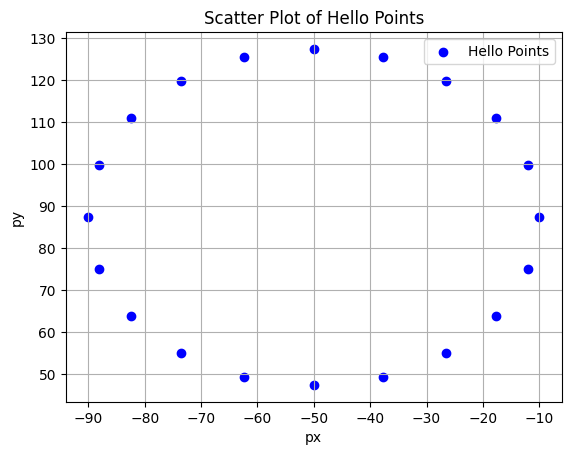

In [ ]:
x_min, x_max = -100, 0
y_min, y_max = 50, 125


hello_points = [
    (-90, 50), (-90, 70), (-90, 90), (-90, 110),  # H vertical left
    (-80, 80), (-70, 80),  # H horizontal
    (-60, 50), (-60, 70), (-60, 90), (-60, 110),  # H vertical right

    (-50, 50), (-50, 110),  # E vertical
    (-50, 50), (-40, 50),  # E bottom horizontal
    (-50, 80), (-40, 80),  # E middle horizontal
    (-50, 110), (-40, 110),  # E top horizontal

    (-30, 50), (-30, 110),  # L vertical
    (-30, 50), (-20, 50),  # L horizontal

    (-10, 50), (-10, 110),  # L vertical
    (-10, 50), (0, 50),  # L horizontal

    (10, 50), (10, 110),  # O vertical left
    (10, 110), (20, 110),  # O top horizontal
    (20, 50), (20, 110),  # O vertical right
    (10, 50), (20, 50)  # O bottom horizontal
]



hello_x, hello_y = zip(*list( )

plt.scatter(hello_x, hello_y, c='blue', label='Hello Points')
plt.xlabel('px')
plt.ylabel('py')
plt.title('Scatter Plot of Hello Points')
plt.legend()
plt.grid(True)
plt.show()

In [138]:
points = []

for r in (50,40,30,20,10):
    points += list(generate_circle_points( (x_min+x_max)/2, (y_min+y_max)/2, r, 20))
    
servo = PTServoArduino(serial_port, baud_rate)
print(servo.check_status())
df = draw_points(servo, points, n=5)
servo.ser.close()

Opened serial port /dev/tty.usbmodem22121401






KeyboardInterrupt: 

In [ ]:
from math import radians

x_min, x_max = -100, 0
y_min, y_max = 50, 125

def generate_open_star_points(center_x, center_y, radius, num_points=5):
    points = []
    angle = 360 / num_points
    for i in range(num_points * 2):  # Double the points for star shape
        r = radius if i % 2 == 0 else radius / 2  # Alternate between outer and inner radius
        theta = radians(i * angle / 2)  # Half angle for star points
        x = center_x + r * cos(theta)
        y = center_y + r * sin(theta)
        points.append((x, y))
    return points

center_x = (x_min + x_max) / 2
center_y = (y_min + y_max) / 2
radius = min((x_max - x_min) / 2, (y_max - y_min) / 2)

star_points = generate_open_star_points(center_x, center_y, radius)

def generate_crossing_star_points(center_x, center_y, radius, num_points=5):
    points = []
    angle = 360 / num_points
    for i in range(num_points * 2):  # Double the points for star shape
        r = radius if i % 2 == 0 else radius / 2  # Alternate between outer and inner radius
        theta = radians(i * angle)  # Full angle for crossing star points
        x = center_x + r * cos(theta)
        y = center_y + r * sin(theta)
        points.append((x, y))
    return points

star_points = generate_crossing_star_points(center_x, center_y, radius)

servo = PTServoArduino(serial_port, baud_rate)
print(servo.check_status())
df = draw_points(servo, star_points, n=20)
servo.ser.close()

Opened serial port /dev/tty.usbmodem22121401






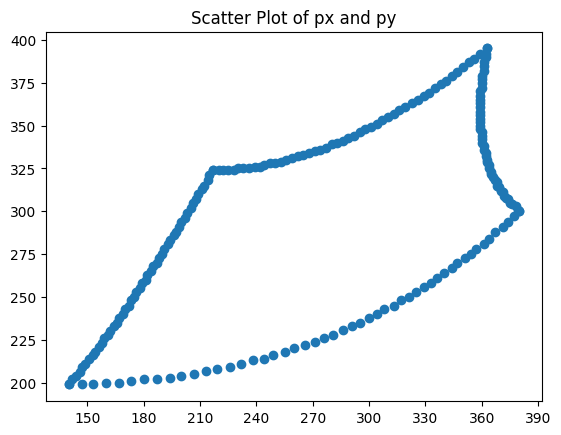

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator



plt.scatter(df['px'], df['py'])

#plt.scatter(df['ay'], df['py'].apply(angle_to_pulse), color='red')

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
plt.title('Scatter Plot of px and py')

plt.show()

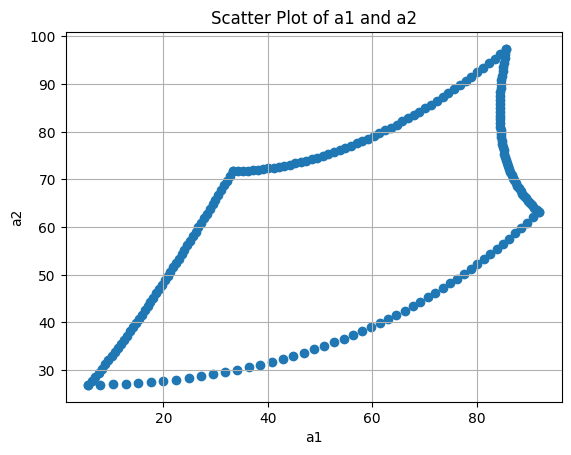

In [81]:
plt.scatter(df['a1'], df['a2'])
plt.xlabel('a1')
plt.ylabel('a2')
plt.title('Scatter Plot of a1 and a2')
plt.grid(True)
plt.show()